# Package Overview

`dataretrieval` is available on the Python Package Index (PyPI).

```bash
pip install dataretrieval
```
and `conda-forge`
```bash
conda install -c conda-forge dataretrieval
```

In [1]:
from dataretrieval import nwis

The user functions in the `nwis` module are prefixed with `get_`.
The one exception is the  function `what_sites`; however, it's just a wrapper

Let's begin by listing 

In [2]:
[i for i in dir(nwis) if "get" in i or "what" in i]

['get_discharge_measurements',
 'get_discharge_peaks',
 'get_dv',
 'get_gwlevels',
 'get_info',
 'get_iv',
 'get_pmcodes',
 'get_qwdata',
 'get_ratings',
 'get_record',
 'get_stats',
 'get_water_use',
 'what_sites']

(note: we can view a function's doc using `help(nwis.get_dv)` or `nwis.get_dv?`

In [3]:
nwis.get_dv?

Signature:
nwis.get_dv(
    sites: Union[List[str], str, NoneType] = None,
    start: Optional[str] = None,
    end: Optional[str] = None,
    multi_index: bool = True,
    ssl_check: bool = True,
    **kwargs,
) -> Tuple[pandas.core.frame.DataFrame, dataretrieval.utils.BaseMetadata]
Docstring:
Get daily values data from NWIS and return it as a ``pandas.DataFrame``.

.. note:

    If no start or end date are provided, only the most recent record
    is returned.

Parameters
----------
sites: string or list of strings, optional, default is None
    USGS site number (or list of site numbers)
start: string, optional, default is None
    If the waterdata parameter startDT is supplied, it will overwrite the
    start parameter (YYYY-MM-DD)
end: string, optional, default is None
    If the waterdata parameter endDT is supplied, it will overwrite the
    end parameter (YYYY-MM-DD)
multi_index: bool, optional
    If True, return a multi-index dataframe, if False, return a
    single-index data

# National Water Information System (NWIS) 
USGS data comes from the National Water Information System (NWIS). 
There are many types of data served from NWIS. 
To understand how the services are separated, it's helpful to understand the terms here:

## USGS Basic Retrievals

The USGS uses various codes for basic retrievals. These codes can have leading zeros, therefore in Python they need to be strings ("01234567").

* Site ID (often 8 or 15-digits)
* Parameter Code (5 digits)
    + Full list:
    + [https://nwis.waterdata.usgs.gov/usa/nwis/pmcodes](https://nwis.waterdata.usgs.gov/usa/nwis/pmcodes)
    + Alternatively use `nwis.get_pmcodes("all")`
* Statistic Code (for daily values)
    + Full list:
    + [http://help.waterdata.usgs.gov/code/stat_cd_nm_query?stat_nm_cd=%25&fmt=html](http://help.waterdata.usgs.gov/code/stat_cd_nm_query?stat_nm_cd=%25&fmt=html)


In [4]:
# df, _ = nwis.get_pmcodes("00060"); df

Here a few of the most common parameter codes

| Code  | Name         |
| ------| ------------ |
|00060  | Discharge    |
|00065  | Gage Height  |
|00010	| Temperature  |
|00400	| pH           |

And here are a few common statistic codes

| Code  | Name         |
| ------| ------------ |
|00001  | Maximum      |
|00002  | Minimum      |
|00003	| Mean         |
|00008	| Median       |


The `nwis.get_pmcodes` function returns information on USGS parameter codes. 
You can use "all" to get a full list, then filter out those of interest.

Here is one example to find all the phosphorous parameter codes:

In [5]:
df, _ = nwis.get_pmcodes("all")

In [6]:
df[df.parm_nm.str.contains("Phosphorus", case=False)].head(10)

,parm_cd,group,parm_nm,epa_equivalence,result_statistical_basis,result_time_basis,result_weight_basis,result_particle_size_basis,result_sample_fraction,result_temperature_basis,CASRN,SRSName,parm_unit
208,00662,Nutrient,"Phosphorus, water, unfiltered, recoverable, mi...",Agree,NaN,NaN,NaN,NaN,Recoverable,NaN,7723-14-0,,ug/l as P
209,00665,Nutrient,"Phosphorus, water, unfiltered, milligrams per ...",Agree,NaN,NaN,NaN,NaN,Total,NaN,7723-14-0,Phosphorus,mg/l as P
210,00666,Nutrient,"Phosphorus, water, filtered, milligrams per li...",Agree,NaN,NaN,NaN,NaN,Dissolved,NaN,7723-14-0,Phosphorus,mg/l as P
211,00667,Nutrient,"Phosphorus, suspended sediment, total, milligr...",Agree,NaN,NaN,NaN,NaN,Suspended,NaN,7723-14-0,Phosphorus,mg/l as P
212,00668,Nutrient,"Phosphorus, bed sediment, total, dry weight, m...",Agree,NaN,NaN,Dry,NaN,Bed Sediment,NaN,7723-14-0,Phosphorus,mg/kg as P
213,00669,Nutrient,"Hydrolyzable phosphorus, water, unfiltered, mi...",Agree,NaN,NaN,NaN,NaN,Total,NaN,,,mg/l as P
214,00670,Nutrient,"Organic phosphorus, water, unfiltered, milligr...",Agree,NaN,NaN,NaN,NaN,Total,NaN,,Organic phosphorus,mg/l as P
215,00671,Nutrient,"Orthophosphate, water, filtered, milligrams pe...",Agree,NaN,NaN,NaN,NaN,Dissolved,NaN,14265-44-2,Phosphate,mg/l as P
216,00672,Nutrient,"Hydrolyzable phosphorus, water, filtered, mill...",Agree,NaN,NaN,NaN,NaN,Dissolved,NaN,,,mg/l as P
217,00673,Nutrient,"Organic phosphorus, water, filtered, milligram...",Agree,NaN,NaN,NaN,NaN,Dissolved,NaN,,Organic phosphorus,mg/l as P


site = "05427948"
pcode = "00060"
start = "2017-10-01"
end = <- "2018-09-30"



In [7]:
site = "05427948"
pcode = "00060"
start = "2017-10-01"
end = "2024-05-30"


df, meta = nwis.get_dv(
    sites=site,
    start=start,
    end=end,
    parameterCd=pcode,  # kwarg passed to NWIS API
)

Unless your application requires high-frequency (sub daily) data,
I recommend you start with daily values.
- The datasets are smaller, so they are faster to download and consume less memory.
- Data are at a fixed frequency. Instantaneous values aren't always at 15 minutes or the quarter hour. Moreover, different parameters might be at different frequencies.
- Missing daily values are estimated and flagged with an 'e'.

From the Pheasant Creek example, let’s look at the data.

In [9]:
df

,site_no,00060_Mean,00060_Mean_cd
datetime,,,
2017-10-01 00:00:00+00:00,05427948,2.76,A
2017-10-02 00:00:00+00:00,05427948,3.02,A
2017-10-03 00:00:00+00:00,05427948,3.28,A
2017-10-04 00:00:00+00:00,05427948,13.30,A
2017-10-05 00:00:00+00:00,05427948,6.93,"A, e"
...,...,...,...
2024-05-26 00:00:00+00:00,05427948,37.70,P
2024-05-27 00:00:00+00:00,05427948,37.00,P
2024-05-28 00:00:00+00:00,05427948,16.20,P


In [10]:
meta
# the _repr_ displays the query url

NWIS_Metadata(url=https://waterservices.usgs.gov/nwis/dv?format=json&parameterCd=00060&startDT=2017-10-01&endDT=2024-05-30&sites=05427948)

date and time of the query

In [11]:
meta.header

{'Date': 'Mon, 03 Jun 2024 21:01:33 GMT', 'Server': 'Apache-Coyote/1.1', 'Strict-Transport-Security': 'max-age=31536000', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Content-Type': 'application/json', 'Cache-Control': 'max-age=900', 'Expires': 'Mon, 03 Jun 2024 21:16:33 GMT', 'X-UA-Compatible': 'IE=edge,chrome=1', 'Access-Control-Allow-Origin': '*', 'X-Frame-Options': 'deny', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked'}

<Axes: xlabel='datetime'>

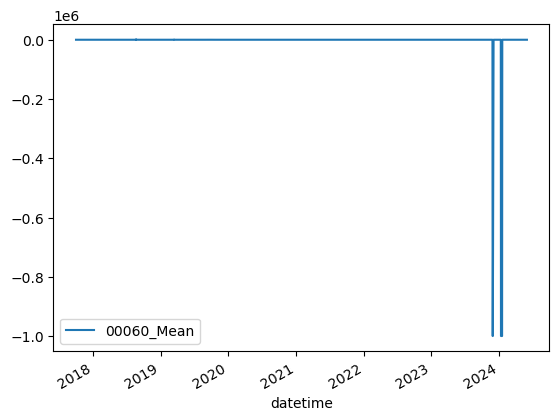

In [12]:
df.plot()

Uh oh. If that plot looks strange, you might want to filter the "approved" data

<Axes: xlabel='datetime'>

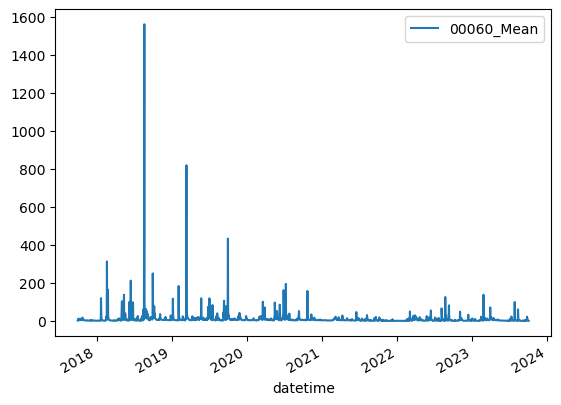

In [13]:
df.loc[~df["00060_Mean_cd"].str.contains("A")] = None
df.plot()

In [14]:
# data gap example
# variable frequency example

In [21]:
# oh no. this is a bug. what_sites returns get_info
site = "05407000"
df, meta = nwis.what_sites(sites=site)
df
# see Laura's example to produce a nice table

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,alt_datum_cd,huc_cd
0,USGS,05407000,"WISCONSIN RIVER AT MUSCODA, WI",ST,43.198056,-90.443333,S,NAD83,666.55,0.01,NAVD88,7070005


The output looks the same `nwis.get_info`, because it is.

In [40]:
state_cd = "IL"
parameter_cd = "00665"  # USGS code for total phosphorus
df, meta = nwis.what_sites(
    stateCd=state_cd,
    parameterCd=parameter_cd,
)

Let's visualizing that query with an interactive map.

In [33]:
import geopandas as gpd

geometry = gpd.points_from_xy(df.dec_long_va, df.dec_lat_va)
gdf = gpd.GeoDataFrame(df, geometry=geometry)

gdf.hvplot.points(geo=True, hover_cols=["site_no", "station_nm"], tiles=True, width=300, size=3)

ModuleNotFoundError: No module named 'geopandas'

A typical workflow might involve downloading the data from these 

In [ ]:
# demonstrate querying all sites with
# df.site_no.apply(lambda x: f'USGS-{x}')
df, _ = nwis.get_qwdata(df.site_no.to_list())

## WQP

In [85]:
from dataretrieval import wqp

df, meta = wqp.get_results(statecode="US:17", pCode="00665", minresults="200", providers="NWIS")

/Users/thodson/micromamba/envs/discontinuum-dev/lib/python3.11/site-packages/dataretrieval/wqp.py:494: UserWarning: USGS discrete water quality data availability and format are changing. Beginning in March 2024 the data obtained from legacy profiles will not include new USGS data or recent updates to existing data. To view the status of changes in data availability and code functionality, visit: https://doi-usgs.github.io/dataRetrieval/articles/Status.html. If you have additional questions about these changes, email CompTools@usgs.gov.
  warnings.warn(('USGS discrete water quality data availability '


In [86]:
df.columns

Index(['OrganizationIdentifier', 'OrganizationFormalName',
       'ActivityIdentifier', 'ActivityTypeCode', 'ActivityMediaName',
       'ActivityMediaSubdivisionName', 'ActivityStartDate',
       'ActivityStartTime/Time', 'ActivityStartTime/TimeZoneCode',
       'ActivityEndDate', 'ActivityEndTime/Time',
       'ActivityEndTime/TimeZoneCode',
       'ActivityDepthHeightMeasure/MeasureValue',
       'ActivityDepthHeightMeasure/MeasureUnitCode',
       'ActivityDepthAltitudeReferencePointText',
       'ActivityTopDepthHeightMeasure/MeasureValue',
       'ActivityTopDepthHeightMeasure/MeasureUnitCode',
       'ActivityBottomDepthHeightMeasure/MeasureValue',
       'ActivityBottomDepthHeightMeasure/MeasureUnitCode', 'ProjectIdentifier',
       'ActivityConductingOrganizationText', 'MonitoringLocationIdentifier',
       'ActivityCommentText', 'SampleAquifer', 'HydrologicCondition',
       'HydrologicEvent', 'SampleCollectionMethod/MethodIdentifier',
       'SampleCollectionMethod/MethodIden

In [87]:
n_samples = df.shape[0]
n_sites = df["MonitoringLocationIdentifier"].unique().shape[0]

print(f"The query returned {n_samples} samples from {n_sites} monitoring sites.")

The query returned 8517 samples from 28 monitoring sites.


In [ ]:
#

212